This version: February 26, 2018

In [7]:
import pandas as pd
import numpy as np

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
pd.options.display.float_format = '{:20,.4f}'.format

## Summary statistics from the input data set 


In [11]:
dflong = pd.read_csv("SP500_Long_V3.CSV")
dflong = dflong[['Ticker','Date','AV','R','DRSD','YR','RC','AVC','RT','AVT','SDC','SDT']]
dflong.describe()
# Can add spy returns from indices long here

,AV,R,DRSD,YR,RC,AVC,RT,AVT,SDC,SDT
count,"72,802.0000","72,802.0000","72,802.0000","72,802.0000","72,802.0000","72,802.0000","72,802.0000","72,802.0000","72,802.0000","72,802.0000"
mean,202.9904,0.0121,0.0175,0.0122,0.0000,-0.0000,-0.0271,0.1605,-0.0000,-0.0292
std,382.9550,0.0846,0.0126,0.0845,0.9988,0.9988,0.9494,1.0560,0.9988,1.0263
min,0.0850,-0.8115,0.0021,-0.8115,-8.0256,-0.7406,-3.0447,-2.6245,-2.5098,-2.5968
25%,54.4716,-0.0319,0.0104,-0.0319,-0.5782,-0.4118,-0.6764,-0.6424,-0.6498,-0.7921
50%,108.0005,0.0127,0.0142,0.0128,-0.0152,-0.2627,-0.0239,0.0172,-0.2122,-0.2366
75%,211.1719,0.0553,0.0203,0.0554,0.5546,0.0151,0.6203,0.8735,0.4072,0.5721
max,"16,801.9915",1.8249,0.4367,1.8249,15.8989,19.3821,3.0327,3.1633,14.4792,3.1617


In [12]:
# Add the SPY data from indices
indices = pd.read_csv("Indices_Long_V3.CSV")
indices = indices[indices['Ticker'] == 'SPY'][['Date','R','DRSD','YR']]
indices.rename(columns = {'R':'SPY_R', 'YR': 'SPY_YR', 'DRSD': 'SPY_DRSD'}, inplace = True)
display(indices)

,Date,SPY_R,SPY_DRSD,SPY_YR
534,2003-11-26,0.0113,0.0067,0.0362
535,2003-12-26,0.0362,0.0057,0.0454
536,2004-01-27,0.0454,0.0066,0.0017
537,2004-02-25,0.0017,0.0059,-0.0430
538,2004-03-24,-0.0430,0.0090,0.0429
539,2004-04-22,0.0429,0.0081,-0.0405
540,2004-05-20,-0.0405,0.0076,0.0364
541,2004-06-21,0.0364,0.0068,-0.0138
542,2004-07-20,-0.0138,0.0063,-0.0245
543,2004-08-17,-0.0245,0.0088,0.0357


In [13]:
# merge etf returns and volumes (market data)
dflong = dflong.merge(indices, how='left', on='Date', sort=False)
print dflong.shape
display(dflong)

(72802, 15)


,Ticker,Date,AV,R,DRSD,YR,RC,AVC,RT,AVT,SDC,SDT,SPY_R,SPY_DRSD,SPY_YR
0,A,2003-11-26,76.6760,0.1630,0.0178,-0.0026,1.5208,-0.0965,0.6691,2.3063,0.1530,-0.7257,0.0113,0.0067,0.0362
1,A,2003-12-26,61.1830,-0.0026,0.0166,0.2916,-0.5247,-0.1632,-0.2834,1.0123,0.2908,-0.7110,0.0362,0.0057,0.0454
2,A,2004-01-27,138.7625,0.2916,0.0226,-0.0597,2.8893,0.1924,1.8161,2.7908,0.7865,0.1245,0.0454,0.0066,0.0017
3,A,2004-02-25,129.9435,-0.0597,0.0214,-0.1377,-0.8789,0.1337,-1.2857,1.8632,0.6231,-0.0431,0.0017,0.0059,-0.0430
4,A,2004-03-24,107.8090,-0.1377,0.0276,0.0035,-1.9335,0.0190,-1.5687,1.0583,1.2698,1.5750,-0.0430,0.0090,0.0429
5,A,2004-04-22,77.3330,0.0035,0.0212,-0.1727,-0.6473,-0.1382,-0.4129,0.1269,0.5909,-0.1445,0.0429,0.0081,-0.0405
6,A,2004-05-20,92.1400,-0.1727,0.0155,0.0525,-1.7944,-0.0632,-1.4241,0.4515,-0.1287,-1.4355,-0.0405,0.0076,0.0364
7,A,2004-06-21,75.9650,0.0525,0.0163,0.0080,-0.0080,-0.0846,0.2201,-0.1137,0.2718,-1.1161,0.0364,0.0068,-0.0138
8,A,2004-07-20,78.5570,0.0080,0.0253,-0.1779,0.1982,-0.1060,-0.1325,-0.1197,1.3935,1.1191,-0.0138,0.0063,-0.0245
9,A,2004-08-17,77.4715,-0.1779,0.0353,0.0560,-2.3988,-0.0998,-1.2528,-0.2373,1.4614,2.3009,-0.0245,0.0088,0.0357


In [ ]:
print list(dflong)

## Results from the test set 


In [64]:
# If the results were generated in one shot, read them in here
res = pd.read_csv("SP500_Results_V3March13.CSV")
print res.shape
display(res)

(14724, 17)


,Ticker,Date,V,P,AV,R,DRSD,YR,Y,pr_0,pr_1,pr_2,Y_pred,Y_mom,Y_rev,Y_rand3,Y_rand2
0,A,2015-03-12,111.7900,39.9600,98.4765,0.0450,0.0124,0.0623,2,0.4533,0.3952,0.1516,0,2,0,1,2
1,AAP,2015-03-12,116.2400,148.6400,176.5655,-0.0805,0.0187,0.0063,1,0.4553,0.4494,0.0953,0,0,2,1,0
2,AAPL,2015-03-12,"6,018.7400",118.6900,"7,759.9455",-0.0034,0.0138,0.0213,1,0.2651,0.5314,0.2035,1,1,1,1,2
3,ABC,2015-03-12,152.6100,100.9200,165.4435,0.0703,0.0066,0.0946,2,0.3121,0.5352,0.1527,1,2,0,1,0
4,ABT,2015-03-12,246.1600,44.3400,260.8770,0.0515,0.0101,-0.0020,0,0.4733,0.3200,0.2067,0,2,0,0,0
5,ACN,2015-03-12,190.9700,82.9700,207.2320,0.0028,0.0109,0.0851,2,0.4276,0.1882,0.3841,0,1,1,0,0
6,ADBE,2015-03-12,130.2800,77.4000,155.7335,0.0601,0.0130,-0.0112,0,0.3151,0.5557,0.1292,1,2,0,2,0
7,ADI,2015-03-12,58.1300,53.9500,103.2235,0.0409,0.0126,0.1170,2,0.3096,0.4609,0.2295,1,2,0,1,0
8,ADM,2015-03-12,165.4500,43.0400,153.9715,-0.0002,0.0122,0.0283,1,0.3911,0.3268,0.2822,0,1,1,1,2
9,ADP,2015-03-12,102.8700,81.4700,176.8765,0.0007,0.0119,-0.0005,0,0.2783,0.4736,0.2481,1,1,1,2,2


In [ ]:
# If the results were generated in two parts, read them in here
# and combine outputs
#res1 = pd.read_csv("SP500_ResultsPart1.CSV")
#res2 = pd.read_csv("SP500_ResultsPart2.CSV")
#res = pd.concat([res1, res2])
#res.reset_index(drop=True, inplace=True)
#res.to_csv('SP500_ResultsCombined.CSV', index = False, float_format='%.4f')

In [15]:
display(res)

,Ticker,Date,V,P,AV,R,DRSD,YR,Y,pr_0,pr_1,pr_2,Y_pred,Y_mom,Y_rev,Y_rand3,Y_rand2
0,A,2015-03-12,111.7900,39.9600,98.4765,0.0450,0.0124,0.0623,2,0.4533,0.3952,0.1516,0,2,0,1,2
1,AAP,2015-03-12,116.2400,148.6400,176.5655,-0.0805,0.0187,0.0063,1,0.4553,0.4494,0.0953,0,0,2,1,0
2,AAPL,2015-03-12,"6,018.7400",118.6900,"7,759.9455",-0.0034,0.0138,0.0213,1,0.2651,0.5314,0.2035,1,1,1,1,2
3,ABC,2015-03-12,152.6100,100.9200,165.4435,0.0703,0.0066,0.0946,2,0.3121,0.5352,0.1527,1,2,0,1,0
4,ABT,2015-03-12,246.1600,44.3400,260.8770,0.0515,0.0101,-0.0020,0,0.4733,0.3200,0.2067,0,2,0,0,0
5,ACN,2015-03-12,190.9700,82.9700,207.2320,0.0028,0.0109,0.0851,2,0.4276,0.1882,0.3841,0,1,1,0,0
6,ADBE,2015-03-12,130.2800,77.4000,155.7335,0.0601,0.0130,-0.0112,0,0.3151,0.5557,0.1292,1,2,0,2,0
7,ADI,2015-03-12,58.1300,53.9500,103.2235,0.0409,0.0126,0.1170,2,0.3096,0.4609,0.2295,1,2,0,1,0
8,ADM,2015-03-12,165.4500,43.0400,153.9715,-0.0002,0.0122,0.0283,1,0.3911,0.3268,0.2822,0,1,1,1,2
9,ADP,2015-03-12,102.8700,81.4700,176.8765,0.0007,0.0119,-0.0005,0,0.2783,0.4736,0.2481,1,1,1,2,2


Error rate: 66.5%
             precision    recall  f1-score   support

          0       0.33      0.33      0.33      4866
          1       0.34      0.34      0.34      4995
          2       0.34      0.34      0.34      4863

avg / total       0.33      0.33      0.33     14724

[[1605 1636 1625]
 [1694 1677 1624]
 [1597 1619 1647]]


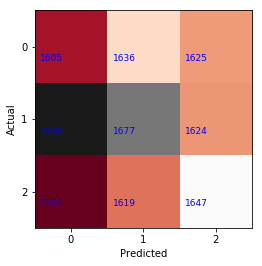

In [18]:
# Random 3-class predictions
show_results(res['Y'], res['Y_rand3'])

Error rate: 65.2%
             precision    recall  f1-score   support

          0       0.33      0.33      0.33      4866
          1       0.37      0.37      0.37      4995
          2       0.34      0.34      0.34      4863

avg / total       0.35      0.35      0.35     14724

[[1616 1596 1654]
 [1607 1845 1543]
 [1642 1551 1670]]


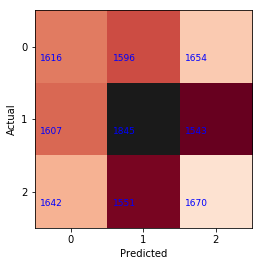

In [19]:
# Reversal predictions 
show_results(res['Y'], res['Y_rev'])

Error rate: 67.0%
             precision    recall  f1-score   support

          0       0.32      0.28      0.30      4866
          1       0.34      0.34      0.34      4995
          2       0.33      0.37      0.35      4863

avg / total       0.33      0.33      0.33     14724

[[1378 1672 1816]
 [1489 1681 1825]
 [1415 1647 1801]]


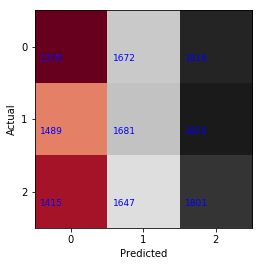

In [20]:
# Network predictions
show_results(res['Y'],res['Y_pred'])

Error rate: 67.0%
             precision    recall  f1-score   support

          0       0.32      0.28      0.30      4866
          1       0.34      0.34      0.34      4995
          2       0.33      0.37      0.35      4863

avg / total       0.33      0.33      0.33     14724

[[1378 1678 1810]
 [1489 1683 1823]
 [1415 1654 1794]]


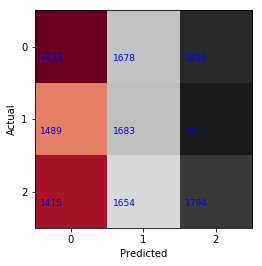

In [21]:
import warnings
warnings.filterwarnings('ignore')
# A more stringent version of prediction
# Predict 0s and 2s only if the associated probability is above a treshold
t1 = res[['Date','YR','Y','pr_0','pr_1','pr_2','Y_pred']]
t1['best'] = res[['pr_0','pr_1','pr_2']].idxmax(axis=1)
t1['Y_newpred'] = 1 # default
t1['Y_newpred'][(t1['best'] == 'pr_0')] = 0
t1['Y_newpred'][(t1['best'] == 'pr_0') &  (t1['pr_0'] >= 0.35)] = 0
t1['Y_newpred'][(t1['best'] == 'pr_2') &  (t1['pr_2'] >= 0.35)] = 2
show_results(t1['Y'], t1['Y_newpred'])

2015-03-12
Error rate: 70.4%
             precision    recall  f1-score   support

          0       0.31      0.33      0.32       135
          1       0.28      0.37      0.32       139
          2       0.30      0.18      0.22       135

avg / total       0.30      0.30      0.29       409

[[45 68 22]
 [52 52 35]
 [47 64 24]]


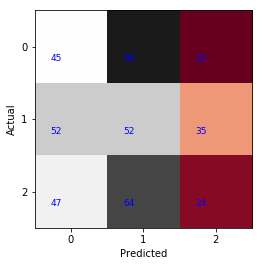

2015-04-10
Error rate: 65.0%
             precision    recall  f1-score   support

          0       0.45      0.28      0.34       136
          1       0.24      0.07      0.11       138
          2       0.34      0.70      0.46       135

avg / total       0.34      0.35      0.30       409

[[ 38  17  81]
 [ 22  10 106]
 [ 25  15  95]]


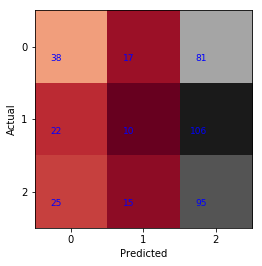

2015-05-08
Error rate: 64.3%
             precision    recall  f1-score   support

          0       0.36      0.04      0.07       135
          1       0.33      0.55      0.41       139
          2       0.40      0.47      0.44       135

avg / total       0.36      0.36      0.31       409

[[ 5 92 38]
 [ 5 77 57]
 [ 4 67 64]]


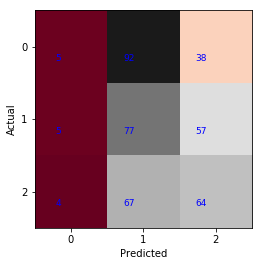

2015-06-08
Error rate: 69.7%
             precision    recall  f1-score   support

          0       0.28      0.51      0.36       135
          1       0.40      0.22      0.29       139
          2       0.29      0.18      0.22       135

avg / total       0.32      0.30      0.29       409

[[69 27 39]
 [89 31 19]
 [91 20 24]]


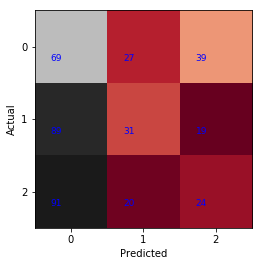

2015-07-07
Error rate: 66.7%
             precision    recall  f1-score   support

          0       0.30      0.16      0.21       135
          1       0.38      0.50      0.43       139
          2       0.30      0.33      0.31       135

avg / total       0.32      0.33      0.32       409

[[22 50 63]
 [27 69 43]
 [25 65 45]]


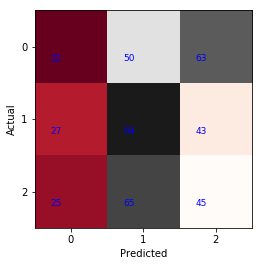

2015-08-04
Error rate: 64.5%
             precision    recall  f1-score   support

          0       0.31      0.24      0.27       135
          1       0.38      0.50      0.43       139
          2       0.35      0.32      0.33       135

avg / total       0.35      0.35      0.35       409

[[32 56 47]
 [36 70 33]
 [34 58 43]]


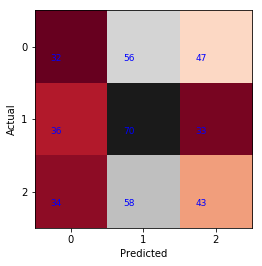

2015-09-01
Error rate: 61.9%
             precision    recall  f1-score   support

          0       0.32      0.21      0.26       135
          1       0.38      0.35      0.36       139
          2       0.41      0.59      0.48       135

avg / total       0.37      0.38      0.37       409

[[29 49 57]
 [36 48 55]
 [27 29 79]]


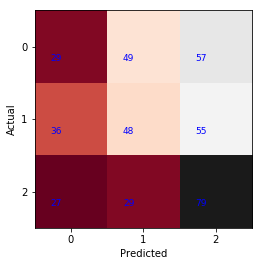

2015-09-30
Error rate: 65.0%
             precision    recall  f1-score   support

          0       0.29      0.35      0.32       135
          1       0.32      0.40      0.36       139
          2       0.54      0.30      0.38       135

avg / total       0.38      0.35      0.35       409

[[47 68 20]
 [69 56 14]
 [46 49 40]]


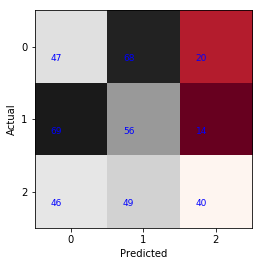

2015-10-28
Error rate: 69.4%
             precision    recall  f1-score   support

          0       0.35      0.29      0.31       135
          1       0.32      0.35      0.33       139
          2       0.26      0.27      0.27       135

avg / total       0.31      0.31      0.31       409

[[39 44 52]
 [37 49 53]
 [37 61 37]]


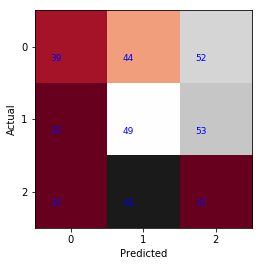

2015-11-25
Error rate: 69.7%
             precision    recall  f1-score   support

          0       0.33      0.10      0.15       135
          1       0.20      0.14      0.17       139
          2       0.34      0.67      0.45       135

avg / total       0.29      0.30      0.25       409

[[ 13  54  68]
 [ 11  20 108]
 [ 16  28  91]]


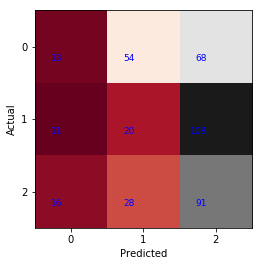

2015-12-24
Error rate: 71.1%
             precision    recall  f1-score   support

          0       0.27      0.19      0.22       135
          1       0.34      0.19      0.24       139
          2       0.28      0.50      0.36       135

avg / total       0.30      0.29      0.27       409

[[25 19 91]
 [29 26 84]
 [37 31 67]]


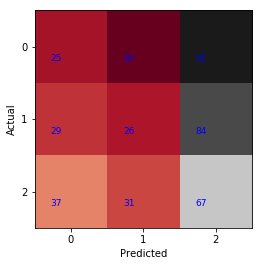

2016-01-26
Error rate: 67.0%
             precision    recall  f1-score   support

          0       0.41      0.39      0.40       136
          1       0.23      0.14      0.17       138
          2       0.32      0.47      0.38       135

avg / total       0.32      0.33      0.32       409

[[53 28 55]
 [40 19 79]
 [37 35 63]]


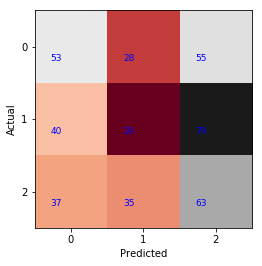

2016-02-24
Error rate: 63.1%
             precision    recall  f1-score   support

          0       0.36      0.70      0.48       135
          1       0.37      0.33      0.35       139
          2       0.42      0.08      0.14       135

avg / total       0.39      0.37      0.32       409

[[94 31 10]
 [88 46  5]
 [78 46 11]]


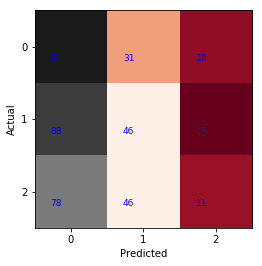

2016-03-23
Error rate: 71.1%
             precision    recall  f1-score   support

          0       0.25      0.12      0.17       136
          1       0.36      0.46      0.40       138
          2       0.23      0.28      0.25       135

avg / total       0.28      0.29      0.27       409

[[17 48 71]
 [20 63 55]
 [31 66 38]]


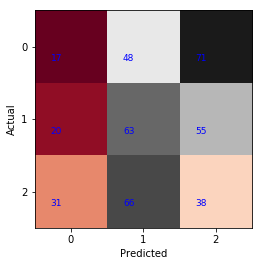

2016-04-21
Error rate: 70.2%
             precision    recall  f1-score   support

          0       0.31      0.21      0.25       135
          1       0.32      0.22      0.26       139
          2       0.29      0.46      0.35       135

avg / total       0.30      0.30      0.29       409

[[29 26 80]
 [33 31 75]
 [33 40 62]]


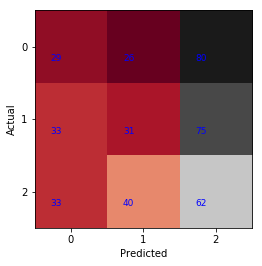

2016-05-19
Error rate: 64.5%
             precision    recall  f1-score   support

          0       0.36      0.30      0.33       135
          1       0.39      0.37      0.38       139
          2       0.32      0.40      0.36       135

avg / total       0.36      0.35      0.35       409

[[40 27 68]
 [41 51 47]
 [29 52 54]]


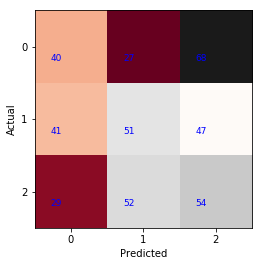

2016-06-17
Error rate: 70.9%
             precision    recall  f1-score   support

          0       0.31      0.35      0.33       135
          1       0.31      0.35      0.33       139
          2       0.24      0.18      0.20       135

avg / total       0.28      0.29      0.29       409

[[47 52 36]
 [49 48 42]
 [57 54 24]]


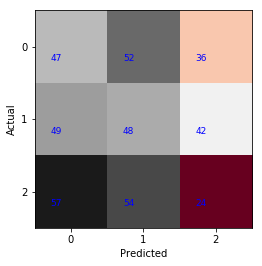

2016-07-18
Error rate: 65.3%
             precision    recall  f1-score   support

          0       0.34      0.18      0.23       135
          1       0.34      0.66      0.45       139
          2       0.38      0.19      0.25       135

avg / total       0.35      0.35      0.31       409

[[24 92 19]
 [23 92 24]
 [24 85 26]]


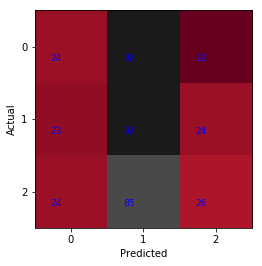

2016-08-15
Error rate: 71.6%
             precision    recall  f1-score   support

          0       0.29      0.15      0.20       135
          1       0.22      0.23      0.23       139
          2       0.33      0.47      0.39       135

avg / total       0.28      0.28      0.27       409

[[20 61 54]
 [30 32 77]
 [20 51 64]]


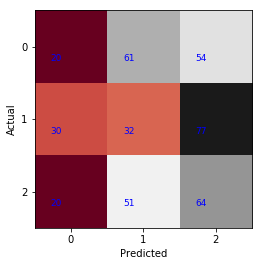

2016-09-13
Error rate: 65.5%
             precision    recall  f1-score   support

          0       0.39      0.18      0.24       135
          1       0.34      0.45      0.39       139
          2       0.34      0.40      0.37       135

avg / total       0.36      0.34      0.33       409

[[24 60 51]
 [21 63 55]
 [16 65 54]]


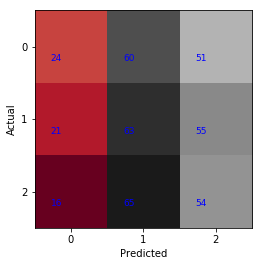

2016-10-11
Error rate: 69.4%
             precision    recall  f1-score   support

          0       0.31      0.61      0.41       137
          1       0.36      0.15      0.21       136
          2       0.26      0.16      0.20       136

avg / total       0.31      0.31      0.27       409

[[83 16 38]
 [91 20 25]
 [95 19 22]]


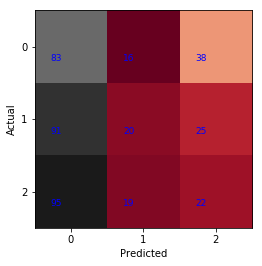

2016-11-08
Error rate: 68.2%
             precision    recall  f1-score   support

          0       0.31      0.25      0.28       135
          1       0.35      0.56      0.43       139
          2       0.23      0.13      0.17       135

avg / total       0.30      0.32      0.29       409

[[34 58 43]
 [44 78 17]
 [32 85 18]]


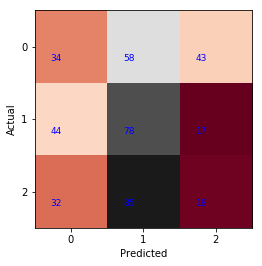

2016-12-07
Error rate: 64.5%
             precision    recall  f1-score   support

          0       0.31      0.23      0.26       135
          1       0.37      0.37      0.37       139
          2       0.37      0.47      0.41       135

avg / total       0.35      0.35      0.35       409

[[31 51 53]
 [35 51 53]
 [35 37 63]]


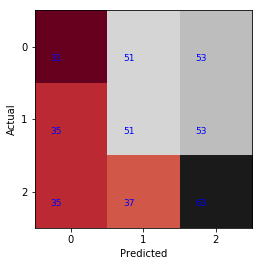

2017-01-06
Error rate: 68.9%
             precision    recall  f1-score   support

          0       0.38      0.11      0.17       135
          1       0.25      0.17      0.21       139
          2       0.32      0.65      0.43       135

avg / total       0.32      0.31      0.27       409

[[ 15  37  83]
 [ 12  24 103]
 [ 13  34  88]]


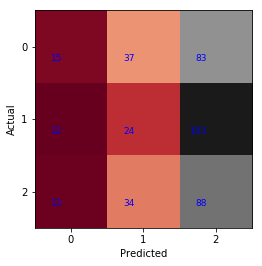

2017-02-06
Error rate: 63.8%
             precision    recall  f1-score   support

          0       0.37      0.33      0.35       135
          1       0.33      0.20      0.25       138
          2       0.37      0.57      0.45       136

avg / total       0.36      0.36      0.35       409

[[44 26 65]
 [44 27 67]
 [31 28 77]]


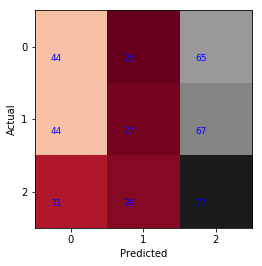

2017-03-07
Error rate: 69.2%
             precision    recall  f1-score   support

          0       0.28      0.49      0.36       136
          1       0.30      0.24      0.27       138
          2       0.43      0.19      0.27       135

avg / total       0.34      0.31      0.30       409

[[67 50 19]
 [90 33 15]
 [83 26 26]]


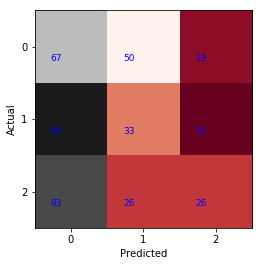

2017-04-04
Error rate: 64.1%
             precision    recall  f1-score   support

          0       0.35      0.24      0.29       135
          1       0.37      0.54      0.44       139
          2       0.35      0.29      0.32       135

avg / total       0.36      0.36      0.35       409

[[33 68 34]
 [26 75 38]
 [36 60 39]]


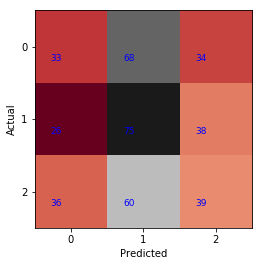

2017-05-02
Error rate: 67.7%
             precision    recall  f1-score   support

          0       0.36      0.36      0.36       135
          1       0.32      0.09      0.14       139
          2       0.30      0.52      0.38       135

avg / total       0.33      0.32      0.29       409

[[49 15 71]
 [36 13 90]
 [52 13 70]]


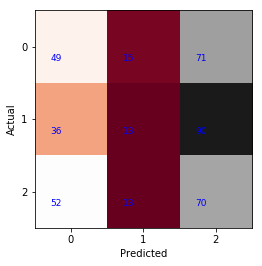

2017-05-31
Error rate: 65.3%
             precision    recall  f1-score   support

          0       0.36      0.25      0.30       135
          1       0.35      0.44      0.39       139
          2       0.34      0.35      0.34       135

avg / total       0.35      0.35      0.34       409

[[34 59 42]
 [28 61 50]
 [33 55 47]]


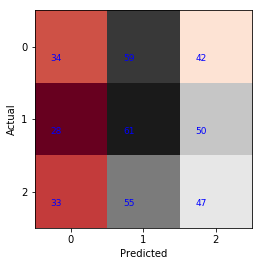

2017-06-28
Error rate: 66.3%
             precision    recall  f1-score   support

          0       0.30      0.30      0.30       135
          1       0.46      0.30      0.37       138
          2       0.30      0.40      0.35       136

avg / total       0.36      0.34      0.34       409

[[41 18 76]
 [46 42 50]
 [50 31 55]]


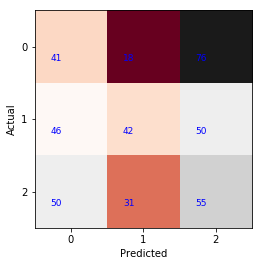

2017-07-27
Error rate: 66.0%
             precision    recall  f1-score   support

          0       0.32      0.30      0.31       135
          1       0.37      0.52      0.43       139
          2       0.31      0.20      0.24       135

avg / total       0.33      0.34      0.33       409

[[40 64 31]
 [37 72 30]
 [49 59 27]]


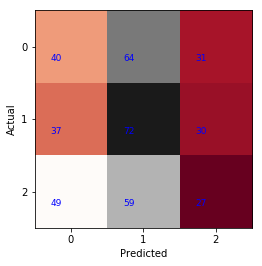

2017-08-24
Error rate: 66.7%
             precision    recall  f1-score   support

          0       0.25      0.11      0.15       135
          1       0.39      0.42      0.41       139
          2       0.31      0.46      0.37       135

avg / total       0.32      0.33      0.31       409

[[15 39 81]
 [23 59 57]
 [21 52 62]]


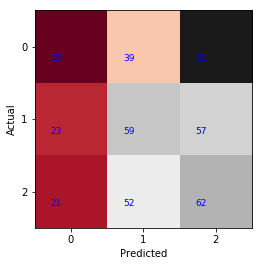

2017-09-22
Error rate: 67.2%
             precision    recall  f1-score   support

          0       0.32      0.48      0.39       135
          1       0.31      0.17      0.22       139
          2       0.34      0.34      0.34       135

avg / total       0.33      0.33      0.31       409

[[65 29 41]
 [69 23 47]
 [67 22 46]]


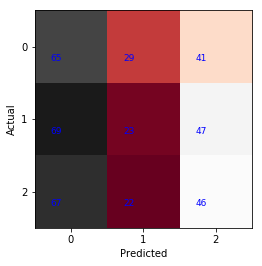

2017-10-20
Error rate: 63.3%
             precision    recall  f1-score   support

          0       0.37      0.27      0.31       135
          1       0.35      0.60      0.44       139
          2       0.43      0.22      0.29       135

avg / total       0.38      0.37      0.35       409

[[37 78 20]
 [37 83 19]
 [27 78 30]]


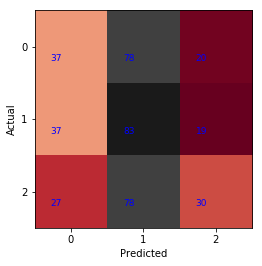

2017-11-20
Error rate: 65.8%
             precision    recall  f1-score   support

          0       0.26      0.24      0.25       135
          1       0.32      0.15      0.21       139
          2       0.39      0.64      0.49       135

avg / total       0.33      0.34      0.31       409

[[32 32 71]
 [54 21 64]
 [36 12 87]]


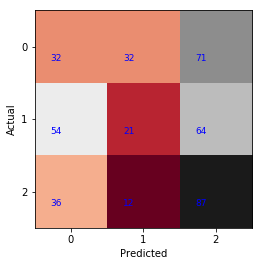

2017-12-19
Error rate: 68.0%
             precision    recall  f1-score   support

          0       0.32      0.34      0.33       135
          1       0.28      0.33      0.30       139
          2       0.39      0.29      0.33       135

avg / total       0.33      0.32      0.32       409

[[46 63 26]
 [59 46 34]
 [41 55 39]]


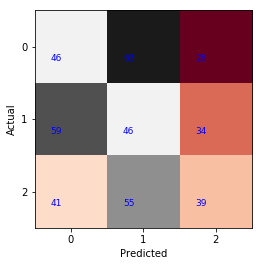

In [22]:
# Model performance for each date
dates = res['Date'].drop_duplicates()
dates = sorted(dates)
#print(dates)

for testdate in dates: 
    y_true = res[res['Date'] == testdate]['Y']
    y_pred = res[res['Date'] == testdate]['Y_pred']
    print testdate
    show_results(y_true, y_pred)

In [23]:
# Comparisons of summary statistics for outcome and predictions
res.describe()

,V,P,AV,R,DRSD,YR,Y,pr_0,pr_1,pr_2,Y_pred,Y_mom,Y_rev,Y_rand3,Y_rand2
count,"14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000"
mean,243.1723,86.6897,244.9557,0.0095,0.0143,0.0105,0.9998,0.3034,0.3398,0.3568,1.0788,0.9999,1.0001,1.0000,0.9927
std,416.0490,103.6464,361.2287,0.0694,0.0076,0.0700,0.8129,0.2371,0.2306,0.2501,0.8089,0.8130,0.8130,0.8155,1.0000
min,6.7100,1.7100,14.4640,-0.4452,0.0025,-0.4452,0.0000,0.0007,0.0008,0.0011,0.0000,0.0000,0.0000,0.0000,0.0000
25%,80.5300,41.5000,94.4298,-0.0284,0.0095,-0.0279,0.0000,0.1053,0.1464,0.1435,0.0000,0.0000,0.0000,0.0000,0.0000
50%,139.3100,64.8800,148.9382,0.0097,0.0125,0.0108,1.0000,0.2434,0.2969,0.3063,1.0000,1.0000,1.0000,1.0000,0.0000
75%,258.6000,100.7825,262.0460,0.0471,0.0170,0.0484,2.0000,0.4555,0.5010,0.5394,2.0000,2.0000,2.0000,2.0000,2.0000
max,"14,231.2500","2,025.0900","8,286.6045",0.7143,0.1271,0.7143,2.0000,0.9924,0.9864,0.9937,2.0000,2.0000,2.0000,2.0000,2.0000


In [24]:
# Actual outcomes
res_Y = res.groupby(['Date','Y'])['YR']\
            .agg({'Y_mean': np.mean, 'Y_median': np.median,\
                  'Y_min': np.min, 'Y_max': np.max,\
                  'Y_std': np.std, 'Y_size': np.size })
res_Y.index = res_Y.index.set_names('DMU', level=1)

In [25]:
# Network prediction
res_Y_pred = res.groupby(['Date','Y_pred'])['YR']\
            .agg({'Y_pred_mean': np.mean, 'Y_pred_median': np.median,\
                  'Y_pred_min': np.min, 'Y_pred_max': np.max,\
                  'Y_pred_std': np.std, 'Y_pred_size': np.size })
res_Y_pred.index = res_Y_pred.index.set_names('DMU', level=1)

In [26]:
# Reversal prediction
res_Y_rev = res.groupby(['Date','Y_rev'])['YR']\
            .agg({'Y_rev_mean': np.mean, 'Y_rev_median': np.median,\
                  'Y_rev_min': np.min, 'Y_rev_max': np.max,\
                  'Y_rev_std': np.std, 'Y_rev_size': np.size })
res_Y_rev.index = res_Y_rev.index.set_names('DMU', level=1)

In [27]:
# Random 3 prediction
res_Y_rand3 = res.groupby(['Date','Y_rand3'])['YR']\
            .agg({'Y_rand3_mean': np.mean, 'Y_rand3_median': np.median,\
                  'Y_rand3_min': np.min, 'Y_rand3_max': np.max,\
                  'Y_rand3_std': np.std, 'Y_rand3_size': np.size })
res_Y_rand3.index = res_Y_rand3.index.set_names('DMU', level=1)

In [28]:
#r1 = pd.concat([res_Y,res_Y_pred],ignore_index=False)
r1 = res_Y.join(res_Y_pred, how='inner')
r2 = r1.join(res_Y_rev, how='inner')
r3 = r2.join(res_Y_rand3, how='inner')
r3.reset_index(level=0, inplace=True) # There are two indices
r3.reset_index(level=0, inplace=True)

In [29]:
display(r3)
#r3.to_csv('SP500_SummaryStats.CSV', index = False, float_format='%.4f')

,DMU,Date,Y_mean,Y_min,Y_size,Y_std,Y_max,Y_median,Y_pred_median,Y_pred_min,...,Y_rev_min,Y_rev_mean,Y_rev_median,Y_rev_size,Y_rand3_median,Y_rand3_min,Y_rand3_max,Y_rand3_mean,Y_rand3_size,Y_rand3_std
0,0,2015-03-12,-0.0190,-0.1188,135.0000,0.0183,0.0020,-0.0151,0.0192,-0.0534,...,-0.1188,0.0223,0.0161,135.0000,0.0154,-0.0477,0.2170,0.0231,136.0000,0.0434
1,1,2015-03-12,0.0165,0.0022,139.0000,0.0083,0.0315,0.0165,0.0154,-0.1188,...,-0.0762,0.0152,0.0085,139.0000,0.0185,-0.1188,0.1550,0.0217,137.0000,0.0443
2,2,2015-03-12,0.0724,0.0317,135.0000,0.0385,0.2170,0.0613,0.0161,-0.0762,...,-0.0594,0.0324,0.0212,135.0000,0.0166,-0.0555,0.1958,0.0249,136.0000,0.0476
3,0,2015-04-10,-0.0517,-0.1630,136.0000,0.0286,-0.0220,-0.0428,-0.0147,-0.1425,...,-0.1425,-0.0092,-0.0108,135.0000,-0.0034,-0.1630,0.1635,-0.0023,136.0000,0.0468
4,1,2015-04-10,-0.0036,-0.0216,138.0000,0.0100,0.0127,-0.0023,-0.0053,-0.1630,...,-0.1521,-0.0013,-0.0015,139.0000,-0.0064,-0.1521,0.1445,-0.0016,137.0000,0.0527
5,2,2015-04-10,0.0531,0.0128,135.0000,0.0384,0.2758,0.0409,-0.0004,-0.1521,...,-0.1630,0.0078,0.0036,135.0000,-0.0001,-0.1425,0.2758,0.0011,136.0000,0.0540
6,0,2015-05-08,-0.0579,-0.1669,135.0000,0.0269,-0.0325,-0.0496,-0.0206,-0.0888,...,-0.1669,-0.0066,-0.0068,135.0000,-0.0186,-0.1632,0.1014,-0.0155,136.0000,0.0432
7,1,2015-05-08,-0.0159,-0.0315,139.0000,0.0102,0.0024,-0.0168,-0.0221,-0.1669,...,-0.1632,-0.0181,-0.0215,138.0000,-0.0232,-0.1139,0.1170,-0.0163,137.0000,0.0415
8,2,2015-05-08,0.0322,0.0030,135.0000,0.0316,0.2647,0.0241,-0.0087,-0.1632,...,-0.1498,-0.0168,-0.0231,136.0000,-0.0109,-0.1669,0.2647,-0.0099,136.0000,0.0476
9,0,2015-06-08,-0.0491,-0.2978,135.0000,0.0353,-0.0164,-0.0367,0.0042,-0.2978,...,-0.1175,0.0046,-0.0004,135.0000,0.0005,-0.2978,0.2067,0.0014,136.0000,0.0568


In [30]:
r3.describe()

,DMU,Y_mean,Y_min,Y_size,Y_std,Y_max,Y_median,Y_pred_median,Y_pred_min,Y_pred_size,...,Y_rev_min,Y_rev_mean,Y_rev_median,Y_rev_size,Y_rand3_median,Y_rand3_min,Y_rand3_max,Y_rand3_mean,Y_rand3_size,Y_rand3_std
count,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,...,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000
mean,1.0000,0.0105,-0.0697,136.3333,0.0305,0.1035,0.0104,0.0103,-0.1813,136.3333,...,-0.1811,0.0105,0.0107,136.3333,0.0110,-0.1846,0.2178,0.0105,136.3333,0.0604
std,0.8203,0.0615,0.1254,1.7773,0.0159,0.1520,0.0531,0.0328,0.0743,63.4388,...,0.0728,0.0341,0.0329,1.7401,0.0319,0.0724,0.0988,0.0329,0.4736,0.0142
min,0.0000,-0.1691,-0.4452,135.0000,0.0077,-0.1016,-0.1466,-0.0806,-0.4452,14.0000,...,-0.4452,-0.1038,-0.0974,135.0000,-0.0814,-0.4452,0.0603,-0.0839,136.0000,0.0366
25%,0.0000,-0.0348,-0.1812,135.0000,0.0135,-0.0013,-0.0296,-0.0029,-0.2197,85.0000,...,-0.2144,-0.0048,-0.0044,135.0000,-0.0013,-0.2170,0.1523,0.0000,136.0000,0.0501
50%,1.0000,0.0104,-0.0146,135.0000,0.0306,0.0326,0.0105,0.0116,-0.1675,128.0000,...,-0.1711,0.0102,0.0097,135.0000,0.0111,-0.1749,0.2066,0.0078,136.0000,0.0599
75%,2.0000,0.0582,0.0269,139.0000,0.0425,0.2142,0.0475,0.0289,-0.1318,181.7500,...,-0.1428,0.0313,0.0285,138.2500,0.0296,-0.1400,0.2459,0.0287,137.0000,0.0662
max,2.0000,0.1874,0.1052,139.0000,0.0718,0.7143,0.1727,0.1075,-0.0446,282.0000,...,-0.0225,0.0889,0.0887,139.0000,0.0804,-0.0477,0.7143,0.0789,137.0000,0.1139


In [31]:
# Convert to "wide format" so that for each date, 
# we can look at summary statistic across Up/Mid/Down classes
r3_wide = r3.pivot(index='Date', columns='DMU')

r3_wide.columns = [''.join(str(col)).strip() for col in r3_wide.columns.values]
cols =list(r3_wide.columns.values)
r3_wide.columns = [col.replace(',', '') for col in r3_wide.columns]
r3_wide.columns = [col.replace(')', '') for col in r3_wide.columns]
r3_wide.columns = [col.replace('(', '') for col in r3_wide.columns]
r3_wide.columns = [col.replace('"', '') for col in r3_wide.columns]
r3_wide.columns = [col.replace("'", '') for col in r3_wide.columns]
r3_wide.columns = [col.replace(' ', '') for col in r3_wide.columns]
r3_wide.reset_index(inplace=True)
#print r3_wide.shape
display(r3_wide)

,Date,Y_mean0,Y_mean1,Y_mean2,Y_min0,Y_min1,Y_min2,Y_size0,Y_size1,Y_size2,...,Y_rand3_max2,Y_rand3_mean0,Y_rand3_mean1,Y_rand3_mean2,Y_rand3_size0,Y_rand3_size1,Y_rand3_size2,Y_rand3_std0,Y_rand3_std1,Y_rand3_std2
0,2015-03-12,-0.0190,0.0165,0.0724,-0.1188,0.0022,0.0317,135.0000,139.0000,135.0000,...,0.1958,0.0231,0.0217,0.0249,136.0000,137.0000,136.0000,0.0434,0.0443,0.0476
1,2015-04-10,-0.0517,-0.0036,0.0531,-0.1630,-0.0216,0.0128,136.0000,138.0000,135.0000,...,0.2758,-0.0023,-0.0016,0.0011,136.0000,137.0000,136.0000,0.0468,0.0527,0.0540
2,2015-05-08,-0.0579,-0.0159,0.0322,-0.1669,-0.0315,0.0030,135.0000,139.0000,135.0000,...,0.2647,-0.0155,-0.0163,-0.0099,136.0000,137.0000,136.0000,0.0432,0.0415,0.0476
3,2015-06-08,-0.0491,0.0014,0.0569,-0.2978,-0.0163,0.0217,135.0000,139.0000,135.0000,...,0.1890,0.0014,0.0019,0.0059,136.0000,137.0000,136.0000,0.0568,0.0474,0.0549
4,2015-07-07,-0.0720,0.0100,0.0673,-0.3579,-0.0196,0.0312,135.0000,139.0000,135.0000,...,0.1653,0.0057,0.0043,-0.0044,136.0000,137.0000,136.0000,0.0627,0.0647,0.0795
5,2015-08-04,-0.1254,-0.0782,-0.0260,-0.2251,-0.0977,-0.0592,135.0000,139.0000,135.0000,...,0.1090,-0.0739,-0.0802,-0.0755,136.0000,137.0000,136.0000,0.0493,0.0410,0.0527
6,2015-09-01,-0.0631,0.0057,0.0642,-0.2064,-0.0178,0.0275,135.0000,139.0000,135.0000,...,0.1124,-0.0006,0.0063,0.0013,136.0000,137.0000,136.0000,0.0618,0.0617,0.0549
7,2015-09-30,-0.0033,0.0794,0.1456,-0.1805,0.0517,0.1013,135.0000,139.0000,135.0000,...,0.2438,0.0708,0.0763,0.0748,136.0000,137.0000,136.0000,0.0676,0.0765,0.0678
8,2015-10-28,-0.0551,0.0063,0.0626,-0.3124,-0.0121,0.0267,135.0000,139.0000,135.0000,...,0.1658,0.0098,0.0044,-0.0004,136.0000,137.0000,136.0000,0.0565,0.0527,0.0676
9,2015-11-25,-0.0812,-0.0114,0.0420,-0.3011,-0.0347,0.0118,135.0000,139.0000,135.0000,...,0.1356,-0.0177,-0.0158,-0.0169,136.0000,137.0000,136.0000,0.0618,0.0558,0.0625


In [32]:
# Long - Short portfolios
r3_wide['Y_'] = r3_wide['Y_mean2'] - r3_wide['Y_mean0']
r3_wide['Y_pred'] = r3_wide['Y_pred_mean2'] - r3_wide['Y_pred_mean0']
r3_wide['Y_rev'] = r3_wide['Y_rev_mean2'] - r3_wide['Y_rev_mean0']
r3_wide['Y_rand3'] = r3_wide['Y_rand3_mean2'] - r3_wide['Y_rand3_mean0']
display(r3_wide)

,Date,Y_mean0,Y_mean1,Y_mean2,Y_min0,Y_min1,Y_min2,Y_size0,Y_size1,Y_size2,...,Y_rand3_size0,Y_rand3_size1,Y_rand3_size2,Y_rand3_std0,Y_rand3_std1,Y_rand3_std2,Y_,Y_pred,Y_rev,Y_rand3
0,2015-03-12,-0.0190,0.0165,0.0724,-0.1188,0.0022,0.0317,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0434,0.0443,0.0476,0.0915,0.0037,0.0101,0.0018
1,2015-04-10,-0.0517,-0.0036,0.0531,-0.1630,-0.0216,0.0128,136.0000,138.0000,135.0000,...,136.0000,137.0000,136.0000,0.0468,0.0527,0.0540,0.1048,0.0143,0.0169,0.0034
2,2015-05-08,-0.0579,-0.0159,0.0322,-0.1669,-0.0315,0.0030,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0432,0.0415,0.0476,0.0902,0.0060,-0.0101,0.0056
3,2015-06-08,-0.0491,0.0014,0.0569,-0.2978,-0.0163,0.0217,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0568,0.0474,0.0549,0.1060,-0.0173,-0.0083,0.0046
4,2015-07-07,-0.0720,0.0100,0.0673,-0.3579,-0.0196,0.0312,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0627,0.0647,0.0795,0.1393,-0.0215,-0.0431,-0.0101
5,2015-08-04,-0.1254,-0.0782,-0.0260,-0.2251,-0.0977,-0.0592,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0493,0.0410,0.0527,0.0993,-0.0042,0.0078,-0.0017
6,2015-09-01,-0.0631,0.0057,0.0642,-0.2064,-0.0178,0.0275,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0618,0.0617,0.0549,0.1273,0.0083,-0.0212,0.0019
7,2015-09-30,-0.0033,0.0794,0.1456,-0.1805,0.0517,0.1013,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0676,0.0765,0.0678,0.1489,0.0172,0.0104,0.0039
8,2015-10-28,-0.0551,0.0063,0.0626,-0.3124,-0.0121,0.0267,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0565,0.0527,0.0676,0.1178,-0.0104,0.0023,-0.0102
9,2015-11-25,-0.0812,-0.0114,0.0420,-0.3011,-0.0347,0.0118,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0618,0.0558,0.0625,0.1232,0.0042,0.0084,0.0007


In [33]:
# Model performance metrics by date
res_log = pd.read_csv('March092018_VolatilitySPYAddedFullDataset_GenerateResultsByDate.csv')
#display(res_log)
r3_wide = r3_wide.merge(res_log, how='left', on='Date', sort=False)
display(r3_wide)

,Date,Y_mean0,Y_mean1,Y_mean2,Y_min0,Y_min1,Y_min2,Y_size0,Y_size1,Y_size2,...,support_tot,act0_pred0,act0_pred1,act0_pred2,act1_pred0,act1_pred1,act2_pred2,act2_pred0,act2_pred1,act2_pred2.1
0,2015-03-12,-0.0190,0.0165,0.0724,-0.1188,0.0022,0.0317,135.0000,139.0000,135.0000,...,409,45,68,22,52,52,35,47,64,24
1,2015-04-10,-0.0517,-0.0036,0.0531,-0.1630,-0.0216,0.0128,136.0000,138.0000,135.0000,...,409,38,17,81,22,10,106,25,15,95
2,2015-05-08,-0.0579,-0.0159,0.0322,-0.1669,-0.0315,0.0030,135.0000,139.0000,135.0000,...,409,5,92,38,5,77,57,4,67,64
3,2015-06-08,-0.0491,0.0014,0.0569,-0.2978,-0.0163,0.0217,135.0000,139.0000,135.0000,...,409,69,27,39,89,31,19,91,20,24
4,2015-07-07,-0.0720,0.0100,0.0673,-0.3579,-0.0196,0.0312,135.0000,139.0000,135.0000,...,409,22,50,63,27,69,43,25,65,45
5,2015-08-04,-0.1254,-0.0782,-0.0260,-0.2251,-0.0977,-0.0592,135.0000,139.0000,135.0000,...,409,32,56,47,36,70,33,34,58,43
6,2015-09-01,-0.0631,0.0057,0.0642,-0.2064,-0.0178,0.0275,135.0000,139.0000,135.0000,...,409,29,49,57,36,48,55,27,29,79
7,2015-09-30,-0.0033,0.0794,0.1456,-0.1805,0.0517,0.1013,135.0000,139.0000,135.0000,...,409,47,68,20,69,56,14,46,49,40
8,2015-10-28,-0.0551,0.0063,0.0626,-0.3124,-0.0121,0.0267,135.0000,139.0000,135.0000,...,409,39,44,52,37,49,53,37,61,37
9,2015-11-25,-0.0812,-0.0114,0.0420,-0.3011,-0.0347,0.0118,135.0000,139.0000,135.0000,...,409,13,54,68,11,20,108,16,28,91


In [34]:
# Market variables
r3_wide = r3_wide.merge(indices, how='left', on='Date', sort=False)
display(r3_wide)

,Date,Y_mean0,Y_mean1,Y_mean2,Y_min0,Y_min1,Y_min2,Y_size0,Y_size1,Y_size2,...,act0_pred2,act1_pred0,act1_pred1,act2_pred2,act2_pred0,act2_pred1,act2_pred2.1,SPY_R,SPY_DRSD,SPY_YR
0,2015-03-12,-0.0190,0.0165,0.0724,-0.1188,0.0022,0.0317,135.0000,139.0000,135.0000,...,22,52,52,35,47,64,24,0.0008,0.0068,0.0187
1,2015-04-10,-0.0517,-0.0036,0.0531,-0.1630,-0.0216,0.0128,136.0000,138.0000,135.0000,...,81,22,10,106,25,15,95,0.0187,0.0075,0.0075
2,2015-05-08,-0.0579,-0.0159,0.0322,-0.1669,-0.0315,0.0030,135.0000,139.0000,135.0000,...,38,5,77,57,4,67,64,0.0075,0.0069,-0.0151
3,2015-06-08,-0.0491,0.0014,0.0569,-0.2978,-0.0163,0.0217,135.0000,139.0000,135.0000,...,39,89,31,19,91,20,24,-0.0151,0.0053,0.0029
4,2015-07-07,-0.0720,0.0100,0.0673,-0.3579,-0.0196,0.0312,135.0000,139.0000,135.0000,...,63,27,69,43,25,65,45,0.0029,0.0074,0.0063
5,2015-08-04,-0.1254,-0.0782,-0.0260,-0.2251,-0.0977,-0.0592,135.0000,139.0000,135.0000,...,47,36,70,33,34,58,43,0.0063,0.0075,-0.0838
6,2015-09-01,-0.0631,0.0057,0.0642,-0.2064,-0.0178,0.0275,135.0000,139.0000,135.0000,...,57,36,48,55,27,29,79,-0.0838,0.0183,0.0043
7,2015-09-30,-0.0033,0.0794,0.1456,-0.1805,0.0517,0.1013,135.0000,139.0000,135.0000,...,20,69,56,14,46,49,40,0.0043,0.0130,0.0906
8,2015-10-28,-0.0551,0.0063,0.0626,-0.3124,-0.0121,0.0267,135.0000,139.0000,135.0000,...,52,37,49,53,37,61,37,0.0906,0.0081,0.0018
9,2015-11-25,-0.0812,-0.0114,0.0420,-0.3011,-0.0347,0.0118,135.0000,139.0000,135.0000,...,68,11,20,108,16,28,91,0.0018,0.0076,-0.0115


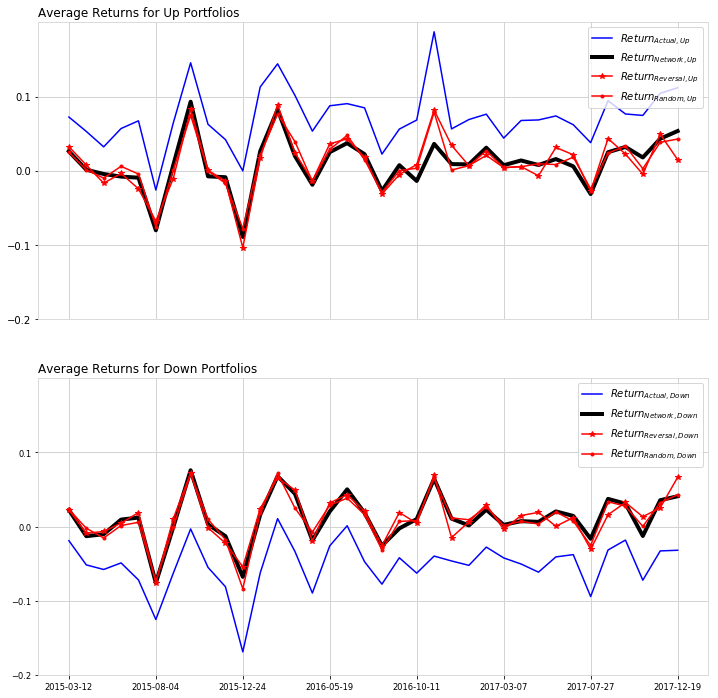

In [35]:
plt.figure(figsize=(12, 12))
plt.rc('axes',edgecolor='lightgray')

ax1 = plt.subplot(211)
plt.title('Average Returns for Up Portfolios', loc='left')
line1, = ax1.plot(r3_wide['Date'], r3_wide['Y_mean2'], 'b-', label='$Return_{Actual, Up}$')
line2, = ax1.plot(r3_wide['Date'], r3_wide['Y_pred_mean2'], 'k-', linewidth=4, label='$Return_{Network, Up}$')
line3, = ax1.plot(r3_wide['Date'], r3_wide['Y_rev_mean2'], 'r*-', label='$Return_{Reversal, Up}$')
line4, = ax1.plot(r3_wide['Date'], r3_wide['Y_rand3_mean2'], 'r.-', label='$Return_{Random, Up}$')

ax1.legend(loc='upper right')
ax1.grid(color='lightgray', linestyle='-', linewidth=1, which='major', axis='both')
ax1.set_ylim([-0.20,0.20])
ax1.yaxis.set_ticks(np.arange(-0.20, 0.20, 0.10))
ax1.set_xticks(ax1.get_xticks()[::5])
ax1.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

plt.subplot(212)
ax2 = plt.subplot(212)
plt.title('Average Returns for Down Portfolios', loc='left')
ax2.grid(color='lightgray', linestyle='-', linewidth=1, which='major', axis='both')
ax2.set_ylim([-0.20,0.20])
ax2.yaxis.set_ticks(np.arange(-0.20, 0.20, 0.10))
ax2.tick_params(labelsize = 'small')
ax2.set_xticks(ax1.get_xticks()[::1])
labels = list(r3_wide['Date'])[::5]
ax2.set_xticklabels(labels )# , fontdict=None, minor=False, **kwargs)¶
n = 1  
[l.set_visible(False) for (i,l) in enumerate(ax2.xaxis.get_ticklabels()) if i % n != 0]

line5, = ax2.plot(r3_wide['Date'], r3_wide['Y_mean0'], 'b-', label='$Return_{Actual, Down}$')
line6, = ax2.plot(r3_wide['Date'], r3_wide['Y_pred_mean0'], 'k-',linewidth=4, label='$Return_{Network, Down}$')
line7, = ax2.plot(r3_wide['Date'], r3_wide['Y_rev_mean0'], 'r*-', label='$Return_{Reversal, Down}$')
line8, = ax2.plot(r3_wide['Date'], r3_wide['Y_rand3_mean0'], 'r.-', label='$Return_{Random, Down}$')
ax2.legend(loc='upper right')

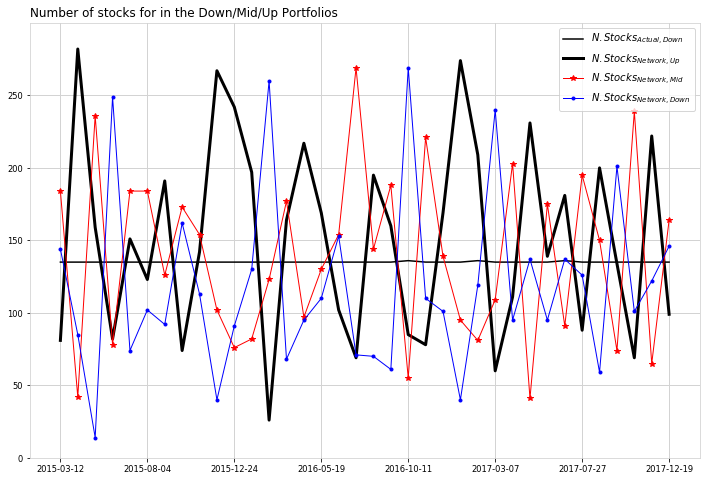

In [36]:
plt.figure(figsize=(12, 8))
plt.rc('axes',edgecolor='lightgray')

ax3 = plt.subplot(111)
plt.title('Number of stocks for in the Down/Mid/Up Portfolios', loc='left')
ax3.grid(color='lightgray', linestyle='-', linewidth=1, which='major', axis='both')
ax3.set_ylim([0,300])
ax3.yaxis.set_ticks(np.arange(0, 300, 50))
ax3.tick_params(labelsize = 'small')
ax3.set_xticks(ax1.get_xticks()[::1])
labels = list(r3_wide['Date'])[::5]
ax3.set_xticklabels(labels )# , fontdict=None, minor=False, **kwargs)¶
n = 1  
[l.set_visible(False) for (i,l) in enumerate(ax3.xaxis.get_ticklabels()) if i % n != 0]

line1, = ax3.plot(r3_wide['Date'], r3_wide['Y_size2'], 'k-', label='$N. Stocks_{Actual, Down}$')
line2, = ax3.plot(r3_wide['Date'], r3_wide['Y_pred_size2'], 'k-', linewidth=3, label='$N. Stocks_{Network, Up}$')
line3, = ax3.plot(r3_wide['Date'], r3_wide['Y_pred_size1'], 'r*-', linewidth=1, label='$N. Stocks_{Network, Mid}$')
line4, = ax3.plot(r3_wide['Date'], r3_wide['Y_pred_size0'], 'b.-', linewidth=1, label='$N. Stocks_{Network, Down}$')
ax3.legend(loc='upper right')

In [ ]:
plt.figure(figsize=(12, 8))
plt.rc('axes',edgecolor='lightgray')

ax2 = plt.subplot(211)
plt.title('Up (2) Precision and Recall', loc='left')
ax2.grid(color='lightgray', linestyle='-', linewidth=1, which='major', axis='both')
ax2.set_ylim([0, 1])
ax2.yaxis.set_ticks(np.arange(-0, 1, 0.10))
ax2.tick_params(labelsize = 'small')
ax2.set_xticks(ax1.get_xticks()[::1])
labels = list(r3_wide['Date'])[::5]
ax2.set_xticklabels(labels )# , fontdict=None, minor=False, **kwargs)¶
n = 1  
[l.set_visible(False) for (i,l) in enumerate(ax3.xaxis.get_ticklabels()) if i % n != 0]

line3, = ax2.plot(r3_wide['Date'], r3_wide['precision_2'], 'r*-', linewidth=1, label='$Precision_{Up}$')
line4, = ax2.plot(r3_wide['Date'], r3_wide['recall_2'], 'b.-', linewidth=1, label='$Recall_{Up}$')
ax2.legend(loc='upper right')

ax3 = plt.subplot(212)
plt.title('SPY Return and volatility', loc='left')
ax3.grid(color='lightgray', linestyle='-', linewidth=1, which='major', axis='both')
ax3.set_ylim([-0.15, 0.15])
ax3.yaxis.set_ticks(np.arange(-0.15, 0.15, 0.03))
ax3.tick_params(labelsize = 'small')
ax3.set_xticks(ax1.get_xticks()[::1])
labels = list(r3_wide['Date'])[::5]
ax3.set_xticklabels(labels )# , fontdict=None, minor=False, **kwargs)¶
n = 1  
[l.set_visible(False) for (i,l) in enumerate(ax3.xaxis.get_ticklabels()) if i % n != 0]

line1, = ax3.plot(r3_wide['Date'], r3_wide['SPY_R'], 'k-', label='$SPY_Return$')
line2, = ax3.plot(r3_wide['Date'], r3_wide['SPY_DRSD'], 'k-', linewidth=3, label='$SPY_Volatility$')
ax3.legend(loc='upper right')

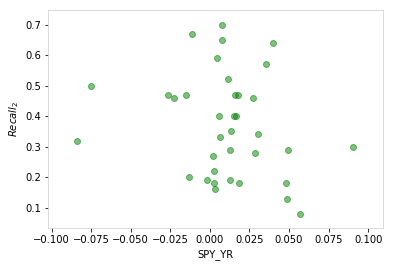

In [40]:
#import matplotlib.pyplot as plt
#import numpy as np
#import matplotlib

# Fixing random state for reproducibility
#np.random.seed(19680801)


#x = np.arange(0.0, 50.0, 2.0)
#y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
#s = np.random.rand(*r3_wide['SPY_YR'].shape) * 800 + 500

plt.scatter(r3_wide['SPY_YR'], r3_wide['recall_2'], c="g", alpha=0.5, #marker=r'$\clubsuit$',
            label="Luck")
plt.xlabel("SPY_YR")
plt.ylabel("$Recall_2$")
#plt.legend(loc=2)
plt.show()

In [62]:
display(res)

,Ticker,Date,V,P,AV,R,DRSD,YR,Y,pr_0,pr_1,pr_2,Y_pred,Y_mom,Y_rev,Y_rand3,Y_rand2,Corr
0,A,2015-03-12,111.7900,39.9600,98.4765,0.0450,0.0124,0.0623,2,0.4533,0.3952,0.1516,0,2,0,1,2,0
1,AAP,2015-03-12,116.2400,148.6400,176.5655,-0.0805,0.0187,0.0063,1,0.4553,0.4494,0.0953,0,0,2,1,0,0
2,AAPL,2015-03-12,"6,018.7400",118.6900,"7,759.9455",-0.0034,0.0138,0.0213,1,0.2651,0.5314,0.2035,1,1,1,1,2,1
3,ABC,2015-03-12,152.6100,100.9200,165.4435,0.0703,0.0066,0.0946,2,0.3121,0.5352,0.1527,1,2,0,1,0,0
4,ABT,2015-03-12,246.1600,44.3400,260.8770,0.0515,0.0101,-0.0020,0,0.4733,0.3200,0.2067,0,2,0,0,0,1
5,ACN,2015-03-12,190.9700,82.9700,207.2320,0.0028,0.0109,0.0851,2,0.4276,0.1882,0.3841,0,1,1,0,0,0
6,ADBE,2015-03-12,130.2800,77.4000,155.7335,0.0601,0.0130,-0.0112,0,0.3151,0.5557,0.1292,1,2,0,2,0,0
7,ADI,2015-03-12,58.1300,53.9500,103.2235,0.0409,0.0126,0.1170,2,0.3096,0.4609,0.2295,1,2,0,1,0,0
8,ADM,2015-03-12,165.4500,43.0400,153.9715,-0.0002,0.0122,0.0283,1,0.3911,0.3268,0.2822,0,1,1,1,2,0
9,ADP,2015-03-12,102.8700,81.4700,176.8765,0.0007,0.0119,-0.0005,0,0.2783,0.4736,0.2481,1,1,1,2,2,0


In [65]:
tmp = dflong[['Ticker','Date','RC','AVC','SDC']]
# Market variables
res = res.merge(tmp, how='left', left_on=['Ticker','Date'], right_on = ['Ticker','Date'], sort=False)
display(res)

,Ticker,Date,V,P,AV,R,DRSD,YR,Y,pr_0,pr_1,pr_2,Y_pred,Y_mom,Y_rev,Y_rand3,Y_rand2,RC,AVC,SDC
0,A,2015-03-12,111.7900,39.9600,98.4765,0.0450,0.0124,0.0623,2,0.4533,0.3952,0.1516,0,2,0,1,2,0.7671,-0.3154,-0.1670
1,AAP,2015-03-12,116.2400,148.6400,176.5655,-0.0805,0.0187,0.0063,1,0.4553,0.4494,0.0953,0,0,2,1,0,-1.5990,-0.1372,1.3491
2,AAPL,2015-03-12,"6,018.7400",118.6900,"7,759.9455",-0.0034,0.0138,0.0213,1,0.2651,0.5314,0.2035,1,1,1,1,2,-0.1461,17.1698,0.1663
3,ABC,2015-03-12,152.6100,100.9200,165.4435,0.0703,0.0066,0.0946,2,0.3121,0.5352,0.1527,1,2,0,1,0,1.2449,-0.1626,-1.5496
4,ABT,2015-03-12,246.1600,44.3400,260.8770,0.0515,0.0101,-0.0020,0,0.4733,0.3200,0.2067,0,2,0,0,0,0.8893,0.0552,-0.7100
5,ACN,2015-03-12,190.9700,82.9700,207.2320,0.0028,0.0109,0.0851,2,0.4276,0.1882,0.3841,0,1,1,0,0,-0.0287,-0.0672,-0.5050
6,ADBE,2015-03-12,130.2800,77.4000,155.7335,0.0601,0.0130,-0.0112,0,0.3151,0.5557,0.1292,1,2,0,2,0,1.0528,-0.1848,-0.0211
7,ADI,2015-03-12,58.1300,53.9500,103.2235,0.0409,0.0126,0.1170,2,0.3096,0.4609,0.2295,1,2,0,1,0,0.6902,-0.3046,-0.1101
8,ADM,2015-03-12,165.4500,43.0400,153.9715,-0.0002,0.0122,0.0283,1,0.3911,0.3268,0.2822,0,1,1,1,2,-0.0855,-0.1888,-0.1994
9,ADP,2015-03-12,102.8700,81.4700,176.8765,0.0007,0.0119,-0.0005,0,0.2783,0.4736,0.2481,1,1,1,2,2,-0.0673,-0.1365,-0.2766


In [66]:
res['Corr'] = (res['Y']==res['Y_pred'])*1
ticker_avg = res.groupby('Ticker', as_index = False).agg({'Corr': 'sum', 'AVC': 'mean', 'RC': 'mean', 'SDC': 'mean'})
ticker_avg['Corr'] = ticker_avg['Corr'] /  r3_wide.shape[0]
display(ticker_avg)

,Ticker,SDC,RC,Corr,AVC
0,A,-0.2419,0.1328,0.1667,-0.4129
1,AAP,0.6773,-0.4056,0.2778,-0.1970
2,AAPL,-0.1426,0.0902,0.4444,12.1860
3,ABC,-0.0395,-0.0683,0.2500,-0.1521
4,ABT,-0.3804,0.0735,0.3333,0.2233
5,ACN,-0.4745,0.1358,0.1944,0.0648
6,ADBE,-0.0735,0.3383,0.4444,0.1187
7,ADI,0.1792,0.1372,0.2500,-0.1847
8,ADM,-0.0883,-0.1391,0.2778,-0.2766
9,ADP,-0.4927,0.0606,0.3333,-0.1213


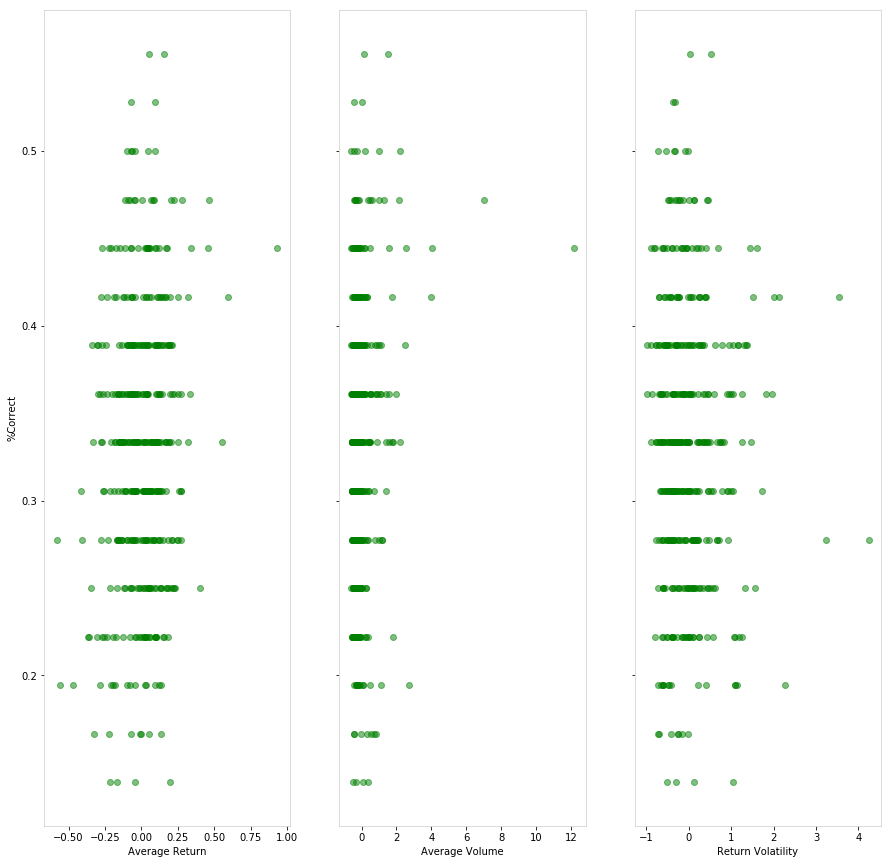

In [74]:
plt.figure(figsize=(15, 15))
plt.rc('axes',edgecolor='lightgray')

sc01 = plt.subplot(131)
plt.scatter(ticker_avg['RC'], ticker_avg['Corr'], c="g", alpha=0.5, #marker=r'$\clubsuit$',
            label="AvgRet")

plt.xlabel("Average Return")
plt.ylabel("%Correct")

sc2 = plt.subplot(132)
plt.scatter(ticker_avg['AVC'], ticker_avg['Corr'], c="g", alpha=0.5, #marker=r'$\clubsuit$',
            label="AvgRet")
sc2.axes.yaxis.set_ticklabels([])
plt.xlabel("Average Volume")
#plt.ylabel("%Correct")

sc3 = plt.subplot(133)
plt.scatter(ticker_avg['SDC'], ticker_avg['Corr'], c="g", alpha=0.5, #marker=r'$\clubsuit$',
            label="AvgRet")
plt.xlabel("Return Volatility")
sc3.axes.yaxis.set_ticklabels([])
plt.show()

In [ ]:
# Model performance on each date plus cumulative returns
means['Y_cum2'] = (1 + means.Y_mean2).cumprod() - 1
means['Y_pred_cum2'] = (1 + means.Y_pred_mean2).cumprod() - 1
means['Y_mom_cum2'] = (1 + means.Y_mom_mean2).cumprod() - 1
means['Y_rand3_cum2'] = (1 + means.Y_rand3_mean2).cumprod() - 1
means['Y_cum0'] = (1 + means.Y_mean0).cumprod() - 1
means['Y_pred_cum0'] = (1 + means.Y_pred_mean0).cumprod() - 1
means['Y_mom_cum0'] = (1 + means.Y_mom_mean0).cumprod() - 1
means['Y_rand3_cum0'] = (1 + means.Y_rand3_mean0).cumprod() - 1
means['Y_cum'] = (1 + means.Y_).cumprod() - 1
means['Y_pred_cum'] = (1 + means.Y_pred).cumprod() - 1
means['Y_mom_cum'] = (1 + means.Y_mom).cumprod() - 1
means['Y_rand3_cum'] = (1 + means.Y_rand3).cumprod() - 1

## Functions


In [17]:
# Inputs are 0/1/2, not the one-hot coded versions
def show_results (y_true, y_pred):

    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    error = 100.0 - (100 * float(correct) / float(total))
    print ("Error rate: %.1f%%" % (error))

    confusions = np.zeros([3, 3], np.float32)
    bundled = zip(y_true, y_pred)
    for actual, predicted in bundled:
        confusions[actual, predicted] += 1

    print classification_report(y_true, y_pred)
    print confusion_matrix(y_true, y_pred)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid(False)
    plt.xticks(np.arange(3))
    plt.yticks(np.arange(3))
    plt.imshow(confusions, cmap=plt.cm.RdGy, interpolation='nearest')

    for i, cas in enumerate(confusions):
        for j, count in enumerate(cas):
            if count >= 0:
                xoff = .07 * len(str(count))
                plt.text(j-xoff, i+.2, int(count), fontsize=9, color='blue')
    plt.show() 